### Wordnet
1. 단어라는 것은 다양한 형태의 특성을 가지고 있음 
2. One - hot으로 하게 되면 단어를 잘 표현하지 못함 
3. Wordnet은 이런 단어의 특성을 잘 표현하기 어휘 사전으로 좋은 공개 SW

### Wordnet 
1. Thesaurus : 어휘분류사전
2. 동의어 집합 or 상위어나 하위어에 대한 정보가 특히 잘 구축되어 있음
3. 그림에서 볼 수 있듯이 Wordnet은 계층적인 구조로 되어있음 
4. 단어와 단어 사이의 거리를 파악 가능, 거리가 가까우면 가까운 뜻을 가진 단어 
5. 모든 것이 Corpus없이 가능하다 
6. 신조어나 사전에 등록되지 않은 단어를 계산할 수 없으며 특정 도메인에 대한 단어로 마친가지이다.
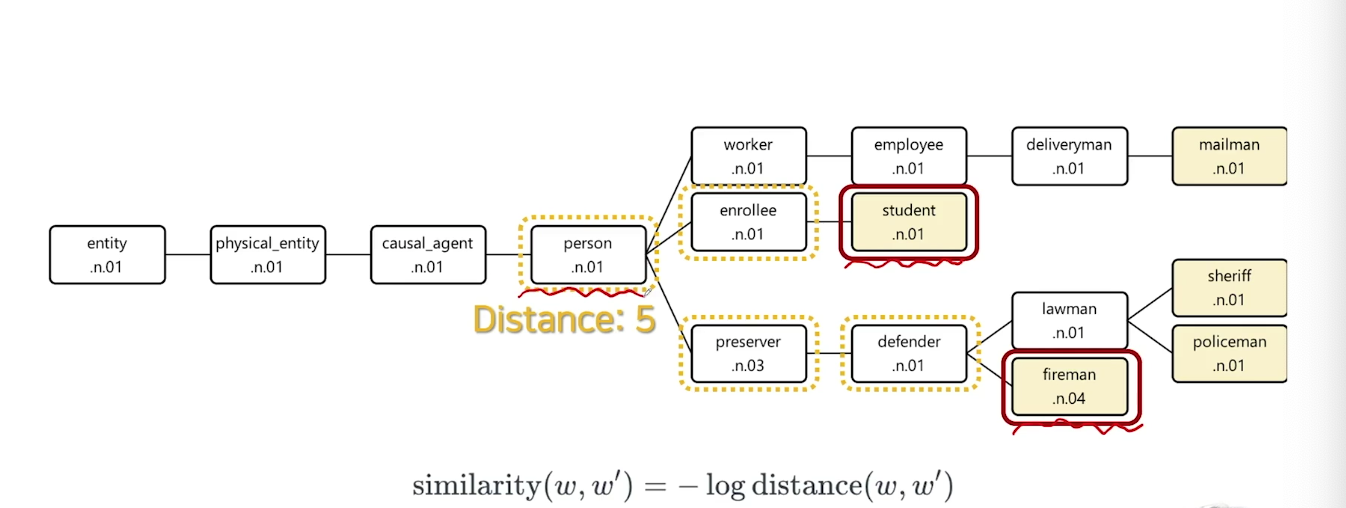

In [1]:
!pip install nltk==3.2.5

     |████████████████████████████████| 1.2 MB 529 kB/s eta 0:00:01     |█████████▋                      | 358 kB 529 kB/s eta 0:00:02
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392141 sha256=c96ed9a39e6edb16d8d0de7e4469cb27269834b46c65876cef3cee811435fdf2
  Stored in directory: /Users/Moon/Library/Caches/pip/wheels/60/de/57/6bced01d340818a36413222e6efcc7766d1f1e4575782b6223
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5


In [2]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /Users/Moon/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
wn.synsets('people')
# people에 동의어는 무엇이 있는가 

[Synset('people.n.01'),
 Synset('citizenry.n.01'),
 Synset('people.n.03'),
 Synset('multitude.n.03'),
 Synset('people.v.01'),
 Synset('people.v.02')]

In [6]:
wn.synsets('people')[0].hypernyms()
# people의 상위어는 무엇인가

[Synset('group.n.01')]

In [11]:
def hypernyms(word):
    current_node = wn.synsets(word)[0]
    # 동의어의 자기자신을 current_node
    yield current_node
    
    while True:
        try:
            current_node = current_node.hypernyms()[0]
            yield current_node
        except IndexError: 
            break

# current_node의 hypernyms가 없을때까지 상위어(hypernyms)를 출력해줌 

for h in hypernyms('firefighter'):
    print(h)

Synset('fireman.n.04')
Synset('defender.n.01')
Synset('preserver.n.03')
Synset('person.n.01')
Synset('causal_agent.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [16]:
def distance(word1, word2):
    word1_hypernyms = [h for h in hypernyms(word1)]
    # word1의 상위어가 없을때 까지 출력해서 변수에 저장 
    
    for i, word2_hypernyms in enumerate(hypernyms(word2)):
        # word2의 상위어
        try:
            return i + word1_hypernyms.index(word2_hypernyms)
        except ValueError:
            continue
            
# word1과 word2의 단어간 거리를 파악할 수 있는 함수 

In [17]:
distance('sheriff', 'student')

6

In [21]:
import numpy as np

def similarity(word1, word2):
    return -np.log(distance(word1, word2))

In [23]:
print(similarity('sheriff', 'student'))
print(similarity('sheriff', 'policeman'))

-1.791759469228055
-0.6931471805599453
